# Table of Contents
* [Filtering](#Filtering)
	* [Filter out dangling ends and self-circles](#Filter-out-dangling-ends-and-self-circles)
	* [Apply filters on the data](#Apply-filters-on-the-data)
		* [Evaluate changes](#Evaluate-changes)


# Filtering

## Filter out dangling ends and self-circles

In [1]:
from pytadbit.mapping.filter import filter_reads

In [2]:
r_enz = 'HindIII'

The `max_molecule_length` parameter used to filter-out pseudo-dangling-ends can be extracted from the previous section in the computation of insert size.

The `min_distance_to_re`, that affects the detection of random breaks, should be a bit larger in order to contain almost all the fragments.

In [3]:
# this will last ~10 minutes
masked = filter_reads(
    'results/fragment/{0}/03_filtering/reads12_{0}.tsv'.format(r_enz), 
    max_molecule_length=750, over_represented=0.005, max_frag_size=100000, 
    min_frag_size=100, re_proximity=5, min_dist_to_re=1000)

Filtered reads (and percentage of total):

     Mapped both                :     13254803 (100.00%)
  -----------------------------------------------------
   1- self-circle               :        36377 (  0.27%)
   2- dangling-end              :       645638 (  4.87%)
   3- error                     :        36450 (  0.27%)
   4- extra dangling-end        :      3687926 ( 27.82%)
   5- too close from RES        :      3182673 ( 24.01%)
   6- too short                 :       286712 (  2.16%)
   7- too large                 :         1412 (  0.01%)
   8- over-represented          :       384171 (  2.90%)
   9- duplicated                :       313899 (  2.37%)
  10- random breaks             :       676535 (  5.10%)


This generates a dictionary with the different filters and the reads affected by each.

## Apply filters on the data

In [4]:
from pytadbit.mapping.filter import apply_filter

apply_filter('results/fragment/{0}/03_filtering/reads12_{0}.tsv'.format(r_enz), 
             'results/fragment/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz), masked, 
             filters=[1, 2, 3, 4, 9, 10])

    saving to file 8301268 reads without .


8301268

### Evaluate changes

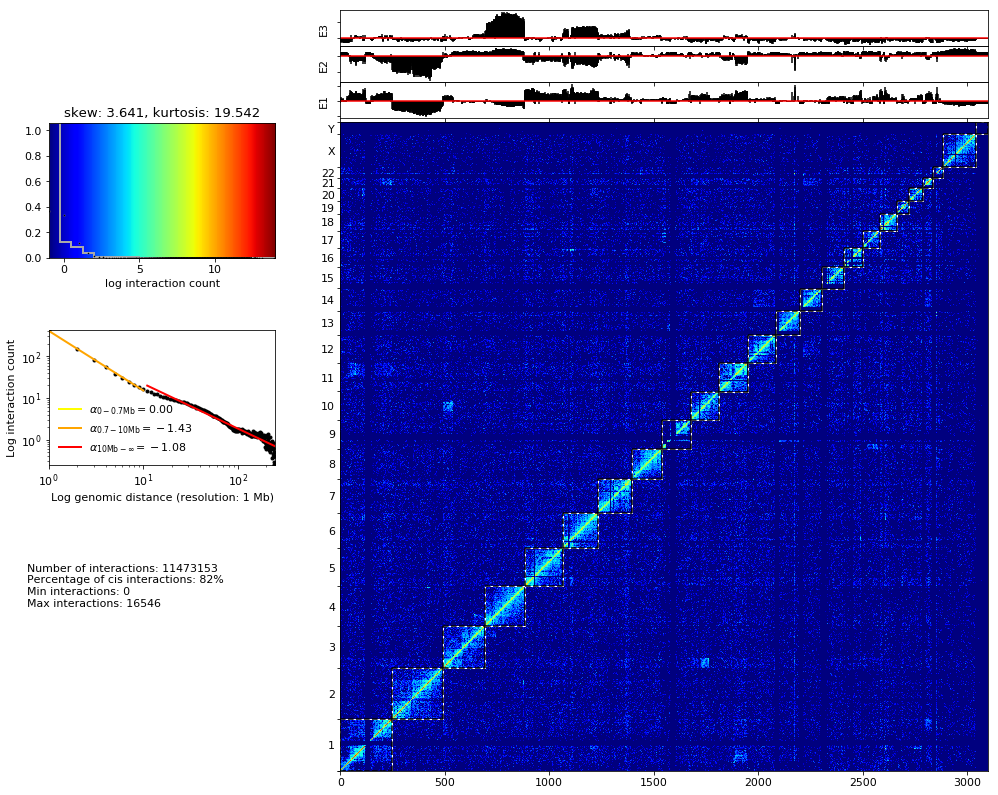

In [5]:
from pytadbit.mapping.analyze import hic_map

hic_map('results/fragment/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz), 
        resolution=1000000, show=True)

Zoom to a single chromosome or a region:

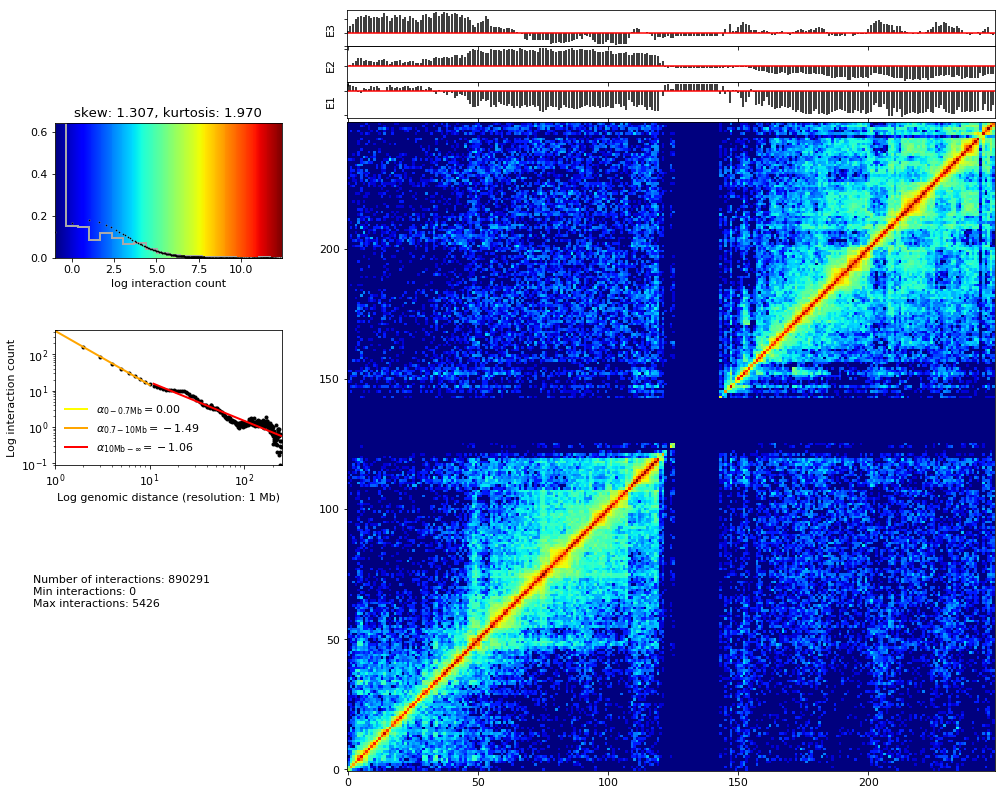

In [6]:
hic_map('results/fragment/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz), 
        resolution=1000000, show=True, focus='1')

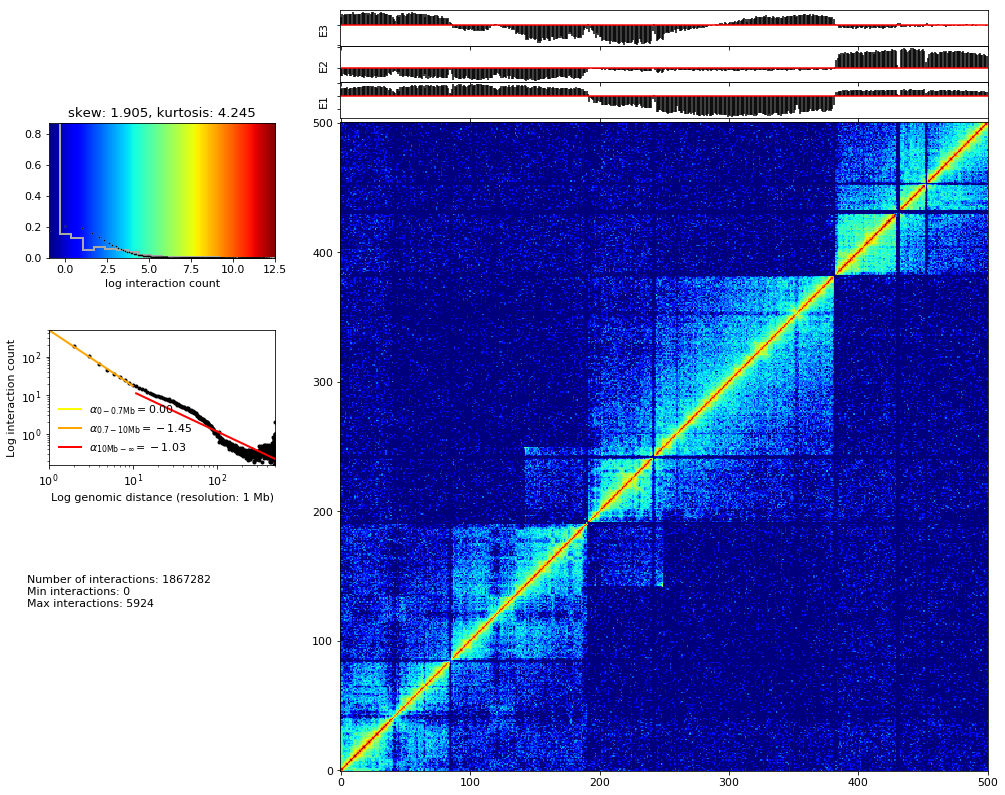

In [7]:
hic_map('results/fragment/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz), 
        resolution=1000000, show=True, focus=(500, 1000))